```markdown
# Úloha 1
```

In [140]:
import numpy as np
import cv2
import math

In [141]:
points_arr_x = []
points_arr_y = []
point_no = 0
#image_url = "coloredChips.png"
image_url = "mojobr.jpg"

In [142]:
def click_event(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDOWN:
        points_arr_x.append(x)
        points_arr_y.append(y)
        print("x: " + str(x), ' ', "y: " + str(y))
        
        global point_no
        if point_no == 0:
            point_no += 1
        else:
            # vykreslenie ciary
            # cv.line(obrazok,start_bod, koniec_bod, RGB_farba, hrubka, typ_spojenia_ciary)
            cv2.line(image_rgb, (points_arr_x[len(points_arr_x)-2], points_arr_y[len(points_arr_y)-2]),(points_arr_x[len(points_arr_x)-1], points_arr_y[len(points_arr_y)-1]), (0,0,0), 2, 8)
            #vypis priemeru
            print("Priemer: " + str(math.sqrt((points_arr_x[len(points_arr_x)-2] - points_arr_x[len(points_arr_x)-1])**2 + (points_arr_y[len(points_arr_y)-2] - points_arr_y[len(points_arr_y)-1])**2)))
            point_no = 0
            cv2.imshow('image', image_rgb)

In [143]:
image_rgb = cv2.imread(image_url)
# Using GaussianBlur instead of medianBlur for a better blurring effect
# Adding Gaussian noise to the image
mean = 0
sigma = 1.2
gaussian_noise = np.random.normal(mean, sigma, image_rgb.shape).astype('uint8')
image_rgb = cv2.add(image_rgb, gaussian_noise)
# image_rgb = cv2.GaussianBlur(image_rgb, (25, 25), 0)
image_rgb = cv2.GaussianBlur(image_rgb, (15, 15), 0)
#image_rgb = cv2.GaussianBlur(image_rgb, (5, 5), 0)

cv2.imshow('image', image_rgb)
cv2.setMouseCallback('image', click_event)
cv2.waitKey(0)

x: 607   y: 378


49

In [144]:
image_gs = cv2.imread(image_url, 0)

# Generate Gaussian noise for the grayscale image
gaussian_noise_gs = np.random.normal(mean, sigma, image_gs.shape).astype("uint8")
image_gs = cv2.add(image_gs, gaussian_noise_gs)
# cv2.imshow('image', image_gs)
# cv2.waitKey(0)

# image_gs = cv2.GaussianBlur(image_gs, (25, 25), 0)
image_gs = cv2.GaussianBlur(image_gs, (15, 15), 0)
#image_gs = cv2.GaussianBlur(image_gs, (5, 5), 0)

# circles = cv2.HoughCircles(image_gs, cv2.HOUGH_GRADIENT, 2, 6, param1=35, param2=22, minRadius=23, maxRadius=25) # for blurry image
# circles = cv2.HoughCircles(image_gs, cv2.HOUGH_GRADIENT, 1.6, 6, param1=90, param2=20.7, minRadius=23, maxRadius=25)  # for noisy image
# circles = cv2.HoughCircles(image_gs, cv2.HOUGH_GRADIENT, 1.9, 70, param1=280, param2=90, minRadius=10, maxRadius=310)  # for my image 1
#circles = cv2.HoughCircles(    image_gs,    cv2.HOUGH_GRADIENT,    1.9,    70,    param1=220,    param2=80,    minRadius=10,    maxRadius=310,)  # for my image 2

circles = cv2.HoughCircles(    image_gs,    cv2.HOUGH_GRADIENT,    1.5,    90,    param1=105,    param2=41,    minRadius=10,    maxRadius=310,)  # for my image 3

if circles is not None:
    circles = np.uint16(np.around(circles))
    print("Number of circles found: " + str(circles.shape[1]))
else:
    print("No circles found")

Number of circles found: 7


In [145]:
if circles is not None:
    for i in circles[0, :]:
        cv2.circle(image_rgb, (i[0], i[1]), i[2], (191, 0, 191), 2)

    cv2.imshow("detected circles", image_rgb)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

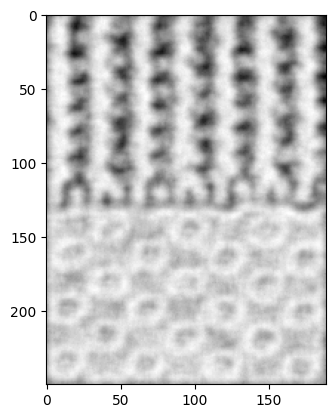

In [146]:
from skimage.filters.rank import entropy
from skimage.morphology import disk
from scipy import ndimage
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt

# Read the image in color and grayscale
image2 = cv2.imread("latka.jpg")  # Load the image in color
image2_gs = cv2.imread("latka.jpg", 0)  # Load the image in grayscale

# Compute the entropy of the grayscale image
image2_ent = entropy(image2_gs, disk(5))

# Display the entropy image
plt.imshow(image2_ent, cmap="gray")
plt.show()

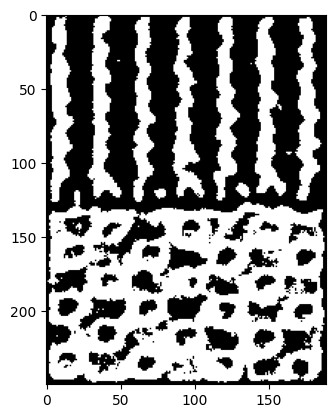

In [147]:
# Apply binary thresholding on the entropy image
(T, thresh) = cv2.threshold(image2_ent, 5.5, 255, cv2.THRESH_BINARY)

# Display the thresholded image
plt.imshow(thresh, cmap="gray")
plt.show()

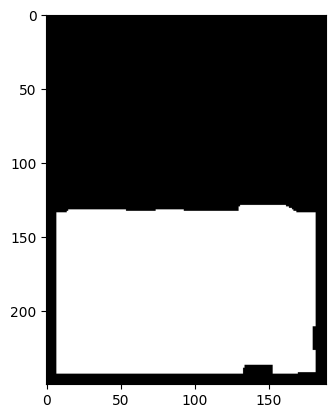

In [148]:
image2_morf = ndimage.binary_opening(thresh, structure=np.ones((4, 8))).astype(int)
image2_morf = ndimage.binary_closing(image2_morf, structure=np.ones((13, 10))).astype(
    int
)
image2_morf = ndimage.binary_opening(image2_morf, structure=np.ones((12, 15))).astype(
    int
)
image2_morf = ndimage.binary_closing(image2_morf, structure=np.ones((16, 15))).astype(
    int
)

# Display the morphologically processed image
plt.imshow(image2_morf, cmap="gray")
plt.show()

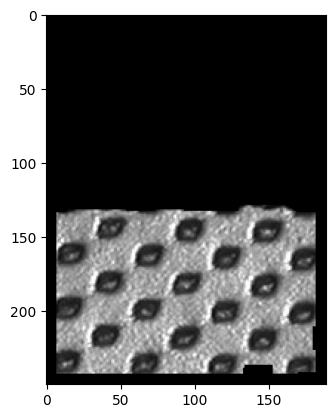

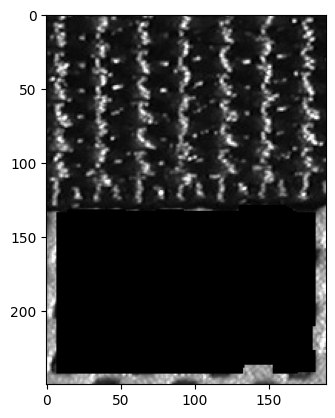

In [149]:
mask = image2_morf.astype(np.uint8)
mask2 = mask ^ 1

image2_mask = cv2.bitwise_and(image2_gs, image2_gs, mask=mask)
image2_mask2 = cv2.bitwise_and(image2_gs, image2_gs, mask=mask2)

plt.imshow(image2_mask, cmap="gray")
plt.show()

plt.imshow(image2_mask2, cmap="gray")
plt.show()

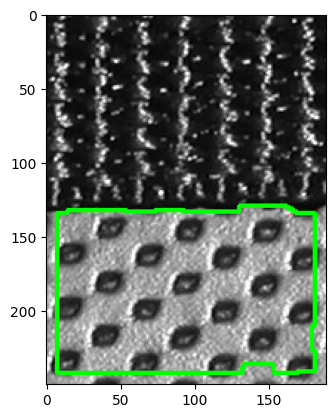

In [150]:
contours, hierarchy = cv2.findContours(
    image2_morf.astype(np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE
)
image2_contours = cv2.drawContours(image2, contours, -1, (0, 255, 0), 2)
plt.imshow(image2_contours)
plt.show()